In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import os
import re

In [3]:
directory_path = "IdVtg"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [2]:
filename = 'TGIdVg_DiffBG _E31-M2.csv'
df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' VD', ' IS'], inplace=True)




df.head()


,VTG,Vbg,ID,ITG,Ibg
0,-2.000,1.0,1.350000e-12,-4.440000e-12,1.850000e-12
1,-1.985,1.0,2.860000e-12,-6.990000e-12,5.900000e-13
2,-1.970,1.0,8.800000e-13,-4.670000e-12,1.570000e-12
3,-1.955,1.0,1.120000e-12,-4.580000e-12,1.020000e-12
4,-1.940,1.0,1.620000e-12,-4.400000e-12,6.000000e-13


In [4]:
df[' forward'] = True

df.loc[(df.index >= 201) & (df.index <= 401), ' forward'] = False
df.loc[(df.index >= 603) & (df.index <= 803), ' forward'] = False
df.loc[(df.index >= 1005) & (df.index <= 1205), ' forward'] = False
df.loc[(df.index >= 1407) & (df.index <= 1607), ' forward'] = False
df.loc[(df.index >= 1809) & (df.index <= 2007), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        VTG   Vbg            ID           ITG           Ibg  forward
0    -2.000  1.00  1.350000e-12 -4.440000e-12  1.850000e-12     True
1    -1.985  1.00  2.860000e-12 -6.990000e-12  5.900000e-13     True
2    -1.970  1.00  8.800000e-13 -4.670000e-12  1.570000e-12     True
3    -1.955  1.00  1.120000e-12 -4.580000e-12  1.020000e-12     True
4    -1.940  1.00  1.620000e-12 -4.400000e-12  6.000000e-13     True
5    -1.925  1.00  7.000000e-13 -2.880000e-12  7.400000e-13     True
6    -1.910  1.00  2.830000e-12 -5.600000e-12  9.500000e-13     True
7    -1.895  1.00  8.300000e-13 -3.910000e-12  1.990000e-12     True
8    -1.880  1.00  1.030000e-12 -4.480000e-12 -3.500000e-13     True
9    -1.865  1.00  1.550000e-12 -4.210000e-12  7.000000e-13     True
10   -1.850  1.00  1.800000e-13 -1.950000e-12  7.400000e-13     True
11   -1.835  1.00  2.280000e-12 -4.450000e-12  2.500000e-13     True
12   -1.820  1.00  7.700000e-13 -3.440000e-12  1.450000e-12     True
13   -1.805  1.00  9.900000e-13 -3

In [9]:
df_new = pd.pivot_table(df,columns=' Vbg',values=[' ID'],index=[' VTG',' forward'])
df_new

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

ID                                            \
 Vbg                     1.00          1.25          1.50          1.75   
 VTG    forward                                                           
-2.000 False     9.200000e-13  1.970000e-12  3.650000e-12  1.270000e-12   
       True      1.350000e-12  1.190000e-12  3.240000e-12  1.980000e-12   
-1.985 False     3.470000e-12  2.650000e-12  2.290000e-12  2.470000e-12   
       True      2.860000e-12  3.500000e-13  1.870000e-12  2.810000e-12   
-1.970 False     7.300000e-13  2.470000e-12  2.370000e-12  1.550000e-12   
...                       ...           ...           ...           ...   
 0.970 True      4.342200e-09  1.092770e-08  2.390220e-08  4.984320e-08   
 0.985 False     4.336400e-09  1.101510e-08  2.373600e-08  4.905160e-08   
       True      4.370300e-09  1.098010e-08  2.369420e-08  4.987460e-08   
 1.000 False     4.335800e-09  1.115870e-08  2.373480e-08  4.921100e-08   
       True      4.368800e-09  1.095350e-08  2.359900e-08  4.900280e-08   

                               
 Vbg                     2.00  
 VTG    forward                
-2.000 False              NaN  
       True      2.450000e-12  
-1.985 False              NaN  
       True      2.315000e-12  
-1.970 False     9.000000e-13  
...                       ...  
 0.970 True      8.261680e-08  
 0.985 False     8.168520e-08  
       True      8.219280e-08  
 1.000 False     8.240900e-08  
       True      8.222620e-08  

[402 rows x 5 columns]

In [13]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 Vbg                     1.00          1.25          1.50          1.75   
 VTG    forward                                                           
-2.000 False     9.200000e-13  1.970000e-12  3.650000e-12  1.270000e-12   
-1.985 False     3.470000e-12  2.650000e-12  2.290000e-12  2.470000e-12   
-1.970 False     7.300000e-13  2.470000e-12  2.370000e-12  1.550000e-12   
-1.955 False     1.490000e-12  8.500000e-13  2.270000e-12  7.400000e-13   
-1.940 False     1.400000e-12  2.970000e-12  5.600000e-13  3.310000e-12   
...                       ...           ...           ...           ...   
 0.940 True      4.280300e-09  1.098190e-08  2.369640e-08  4.937420e-08   
 0.955 True      4.310400e-09  1.073820e-08  2.349960e-08  4.923800e-08   
 0.970 True      4.342200e-09  1.092770e-08  2.390220e-08  4.984320e-08   
 0.985 True      4.370300e-09  1.098010e-08  2.369420e-08  4.987460e-08   
 1.000 True      4.368800e-09  1.095350e-08  2.359900e-08  4.900280e-08   

                               
 Vbg                     2.00  
 VTG    forward                
-2.000 False              NaN  
-1.985 False              NaN  
-1.970 False     9.000000e-13  
-1.955 False     3.890000e-12  
-1.940 False     2.370000e-12  
...                       ...  
 0.940 True      8.320020e-08  
 0.955 True      8.181380e-08  
 0.970 True      8.261680e-08  
 0.985 True      8.219280e-08  
 1.000 True      8.222620e-08  

[402 rows x 5 columns]

In [14]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 Vbg                     1.00          1.25          1.50          1.75   
 VTG    forward                                                           
-2.000 False     9.200000e-13  1.970000e-12  3.650000e-12  1.270000e-12   
-1.985 False     3.470000e-12  2.650000e-12  2.290000e-12  2.470000e-12   
-1.970 False     7.300000e-13  2.470000e-12  2.370000e-12  1.550000e-12   
-1.955 False     1.490000e-12  8.500000e-13  2.270000e-12  7.400000e-13   
-1.940 False     1.400000e-12  2.970000e-12  5.600000e-13  3.310000e-12   

                               
 Vbg                     2.00  
 VTG    forward                
-2.000 False              NaN  
-1.985 False              NaN  
-1.970 False     9.000000e-13  
-1.955 False     3.890000e-12  
-1.940 False     2.370000e-12

In [15]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 1.0), (' ID', 1.25), (' ID', 1.5), (' ID', 1.75), (' ID', 2.0)]

In [16]:

new_list = []
for tup in column_names_list:
    new_list.append(f'Id, V_bg = {tup[1]}')



sorted_df.columns = new_list
sorted_df

Id, V_bg = 1.0  Id, V_bg = 1.25  Id, V_bg = 1.5  \
 VTG    forward                                                    
-2.000 False       9.200000e-13     1.970000e-12    3.650000e-12   
-1.985 False       3.470000e-12     2.650000e-12    2.290000e-12   
-1.970 False       7.300000e-13     2.470000e-12    2.370000e-12   
-1.955 False       1.490000e-12     8.500000e-13    2.270000e-12   
-1.940 False       1.400000e-12     2.970000e-12    5.600000e-13   
...                         ...              ...             ...   
       True        1.620000e-12     1.010000e-12    2.130000e-12   
-1.955 True        1.120000e-12     1.780000e-12    6.900000e-13   
-1.970 True        8.800000e-13     2.360000e-12    3.330000e-12   
-1.985 True        2.860000e-12     3.500000e-13    1.870000e-12   
-2.000 True        1.350000e-12     1.190000e-12    3.240000e-12   

                 Id, V_bg = 1.75  Id, V_bg = 2.0  
 VTG    forward                                   
-2.000 False        1.270000e-12             NaN  
-1.985 False        2.470000e-12             NaN  
-1.970 False        1.550000e-12    9.000000e-13  
-1.955 False        7.400000e-13    3.890000e-12  
-1.940 False        3.310000e-12    2.370000e-12  
...                          ...             ...  
       True         6.100000e-13    1.810000e-12  
-1.955 True         3.530000e-12    2.650000e-12  
-1.970 True         2.260000e-12    2.430000e-12  
-1.985 True         2.810000e-12    2.315000e-12  
-2.000 True         1.980000e-12    2.450000e-12  

[402 rows x 5 columns]

In [17]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new.drop(columns=[' forward'],inplace=True)

df_new.columns

Index(['Id, V_bg = 1.0', 'Id, V_bg = 1.25', 'Id, V_bg = 1.5',
       'Id, V_bg = 1.75', 'Id, V_bg = 2.0'],
      dtype='object')

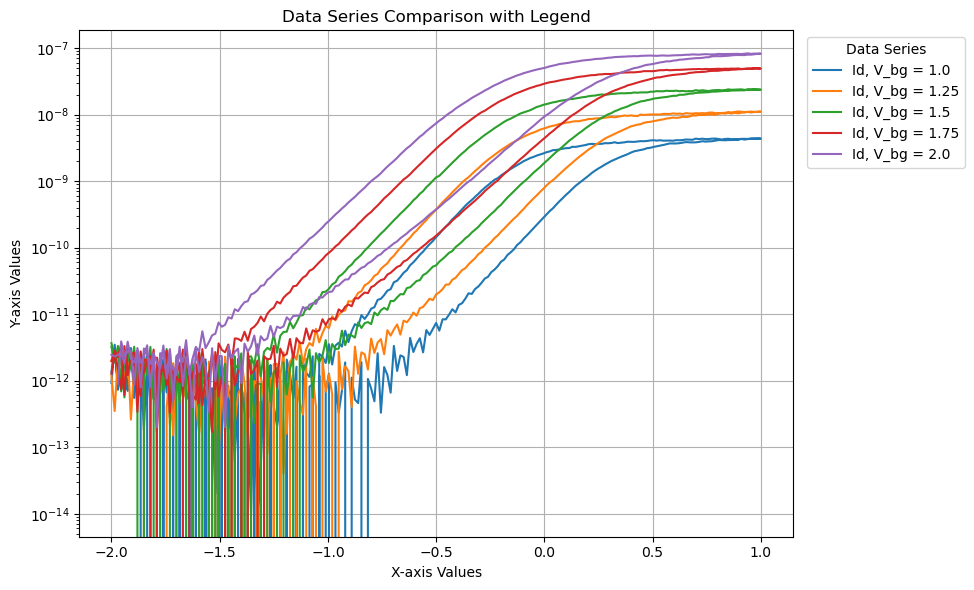

In [18]:
ax = df_new.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [4]:
for file in file_list:
    print(f'{file} started')
    
    Vbg,df = mo.read_csv_IdVtg(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + file[6:]
    df_sorted.to_csv(filename, index=True)

IdVtg\E41-A4_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-D14_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-D17_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-G14_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-I18_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-O15_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E43-H17_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E44-T1_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\sortedIdVtg.zip started


ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['sorted/', 'sorted/E41-A4_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-D14_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-D17_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-G14_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-I18_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-O15_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E43-H17_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E44-T1_ExfoliatedMoS2_TGIdVg_.csv']

In [ ]:
df_new.to_csv(f'IdVtg\\sorted\\{filename[6:]}', index=True)

NameError: name 'df_new' is not defined